In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import plot
%matplotlib inline


In [88]:
bus4 = pd.read_pickle('completed_bus_routes-bus4.pickle')
bus19 = pd.read_pickle('completed_bus_routes-bus19.pickle')

In [89]:
bus4 = bus4[bus4.time_of_day >= 40000]
bus4 = bus4[bus4.duration < bus4.duration.quantile(0.95)]

In [90]:
bus19 = bus19[bus19.time_of_day >= 40000]
bus19 = bus19[bus19.duration < bus19.duration.quantile(0.95)]

In [91]:
df = bus4

In [92]:
df.columns

Index(['duration', 'distance', 'delay', 'trip_start', 'trip_end',
       'delay_start', 'delay_end', 'block_start', 'block_end', 'vehicle_id',
       'type', 'tripID', 'situation', 'routeNumber', 'direction', 'bearing',
       'lastLocID', 'lastStopSeq', 'loadPercentage', 'weekday', 'hour',
       'weekday_num', 'trip_start_time', 'time_of_day', 'duration_minutes'],
      dtype='object')

In [93]:
numeric_cols = df.select_dtypes(include=[np.number])

In [28]:
# sns.pairplot(df, kind='reg', y_vars=['duration_minutes'], x_vars=numeric_cols)

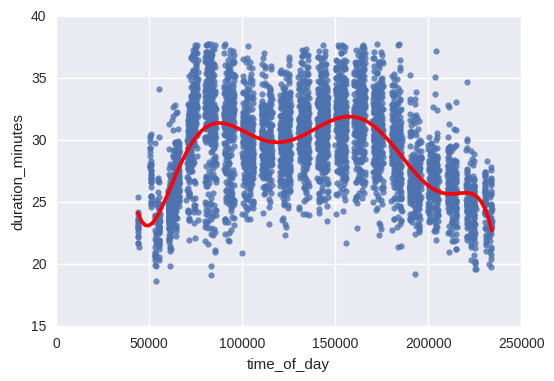

In [94]:
sns.regplot("time_of_day", "duration_minutes", bus4, ci=None, truncate=True, fit_reg=True,  order=7,  line_kws={'color': 'r'})

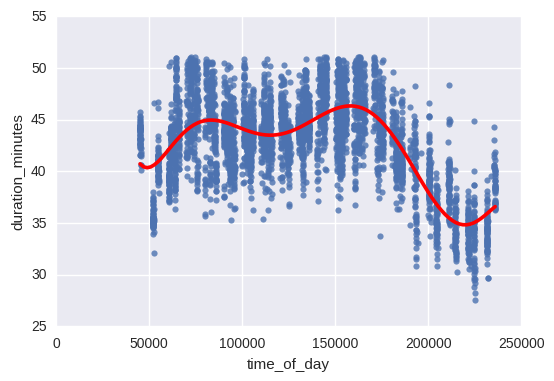

In [102]:
sns.regplot("time_of_day", "duration_minutes", bus19, ci=None, truncate=True, fit_reg=True, order=7, line_kws={'color': 'r'})

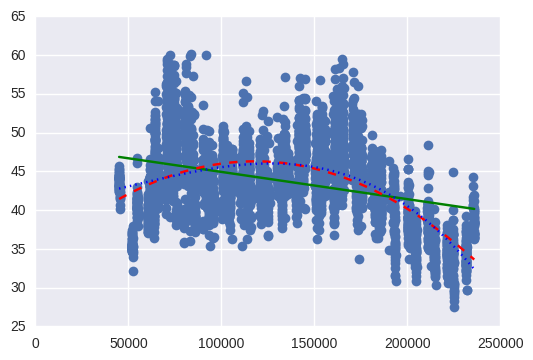

In [97]:
x = df.time_of_day
y = df.duration_minutes
plot(x, y, 'o')

p1 = np.polyfit(x, y, 1)
p2 = np.polyfit(x, y, 2)
p3 = np.polyfit(x, y, 3)

xp = np.linspace(min(x), max(x), 100)
plot(xp, np.polyval(p1, xp), 'g-')
plot(xp, np.polyval(p2, xp), 'r--')
plot(xp, np.polyval(p3, xp), 'b:')

In [ ]:
sns.

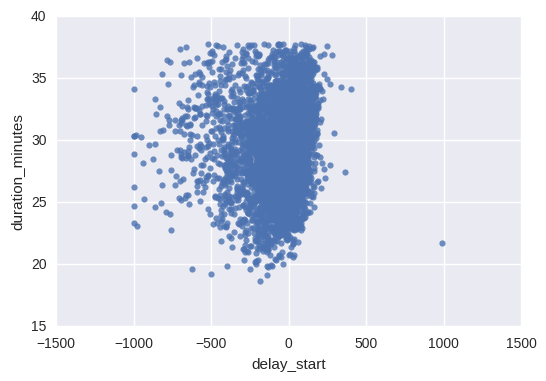

In [107]:
sns.regplot("delay_start", "duration_minutes", bus4, fit_reg=False)

In [16]:
# Can we predict the time of trip based on the Delay at the time of trip start? Or even from a few stops back?

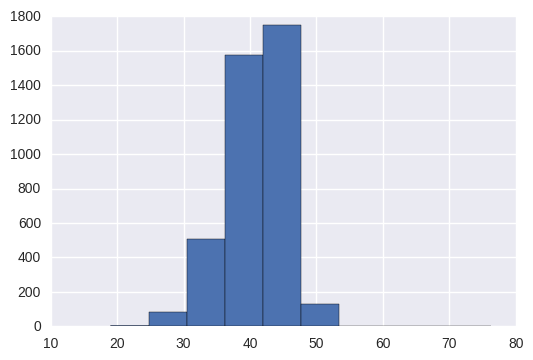

In [26]:
((df.duration.dt.seconds + df.delay)/60).hist()

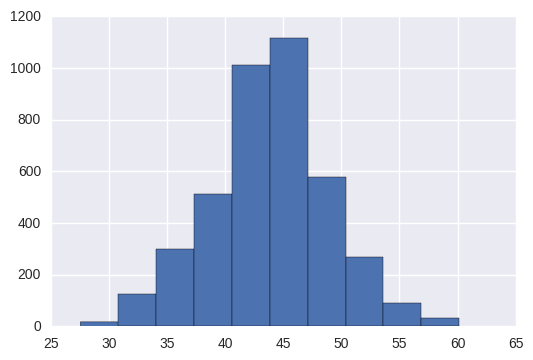

In [28]:
df.duration_minutes.hist()

In [29]:
((df.duration.dt.seconds + df.delay)/60).describe()

count    4057.000000
mean       40.808035
std         4.494630
min        19.033333
25%        38.400000
50%        41.633333
75%        43.616667
max        76.216667
dtype: float64

In [30]:
df.duration.describe()

count                      4057
mean     0 days 00:43:49.611289
std      0 days 00:05:05.201499
min             0 days 00:27:33
25%             0 days 00:40:46
50%             0 days 00:43:58
75%             0 days 00:46:52
max             0 days 01:00:08
Name: duration, dtype: object

In [98]:
df.delay_start

38333      28
38212      28
37958     -14
38336      30
38339      65
37964     -20
38346      92
37968      27
37974    -261
38218      74
38095    -355
38223     180
38227      15
38233      -1
38239       0
38103     105
38111      22
38242    -108
38116    -161
38349      48
38253      -1
37992     114
38354     -83
37997      73
38005      82
38013      81
38121    -297
38263      36
38126    -133
38267     -24
         ... 
22956     -43
23174       3
22959      42
23034      30
22964    -200
23038    -132
23041      38
23179      64
23188    -387
23048    -164
22974     -31
23053      92
23136     120
22980    -183
23058    -695
23198      40
23140     -75
23068     -58
23075      66
23206    -277
23212     -93
23146      49
22988    -236
23102     124
22993    -243
22996       5
23110    -161
23114     -55
23221    -322
23121     -37
Name: delay_start, dtype: object

### Can we create a model that uses 3 input variables? Delay at starting bus stop, weekday, time of day.

### What are the current variations in commute times that we can use for a baseline, before construction?

### What time should I board the bus? 

Based on estimated route length. Is it better to leave 30 min later? Should I convince my bos to let me avoid rushhour?

Plot how long the trip took, against how long it was "suppose" to take at that given time of day. (by subtracting the delay)